## Curve Fitting:

1. **Overfitting** คือการที่แบบจำลอง (Model) ให้ผลลัพธ์ "**ดี**" กับข้อมูลฝึกสอน(Train) แต่ให้ผลการทำนาย(Prediction) ที่"**ไม่ดี**" กับข้อมูลทดสอบ(Test)
2. **Underfitting** คือการที่แบบจำลอง (Model) ให้ผลลัพธ์ที่ "**ไม่ดี**" ทั้งข้อมูลการฝึกสอน (Train) และข้อมูลทดสอบ(Test)



In [4]:
# Step 1: ทำความเข้าใจข้อมูล (Data Understanding)
import pandas as pd

data = pd.DataFrame([[1, 3],
                     [5, 5],
                     [5, 10],
                     [10, 12],
                     [14, 16],
                     [17, 15],
                     [21, 7],
                     [24, 4],
                     [25, 1]])
data

,0,1
0,1,3
1,5,5
2,5,10
3,10,12
4,14,16
5,17,15
6,21,7
7,24,4
8,25,1


In [5]:
# Step 2: เปลี่ยนชื่อคอลัมน์ของ data

data.columns = ['x', 'y']
data.columns

Index(['x', 'y'], dtype='object')

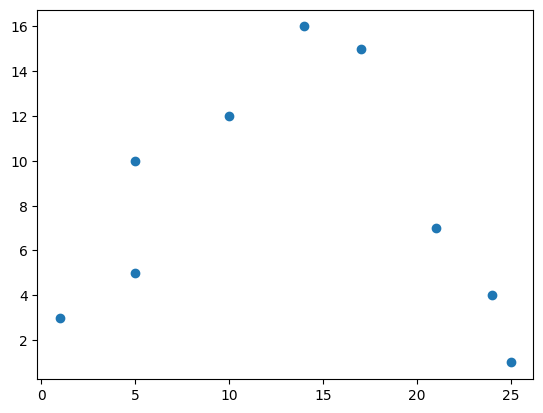

In [6]:
# Step 3: เปลี่ยนข้อมูลให้เห็นเป็นภาพ (Data Visualization)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data['x'], data['y'])       # แสดงความสัมพันธ์ระหว่าง x, y: data['x'], data['y']

In [7]:
# Step 4: นำเข้า Library ที่จำเป็นในการจัดเตรียมข้อมูล และการสร้างแบบจำลอง (Model)

import numpy as np
from sklearn.linear_model import LinearRegression     # Model เชิงเส้น
from sklearn.preprocessing import PolynomialFeatures  # แปลงข้อมูลเข้า (Input/Feature) ให้อยู่ในรูป Polynomial
from sklearn.pipeline import make_pipeline

In [8]:
x = np.array(data['x']) # จัดเก็บข้อมูล x ในรูปของ numpy.array: data['x']
y = np.array(data['y']) # จัดเก็บข้อมูล x ในรูปของ numpy.array: data['y']

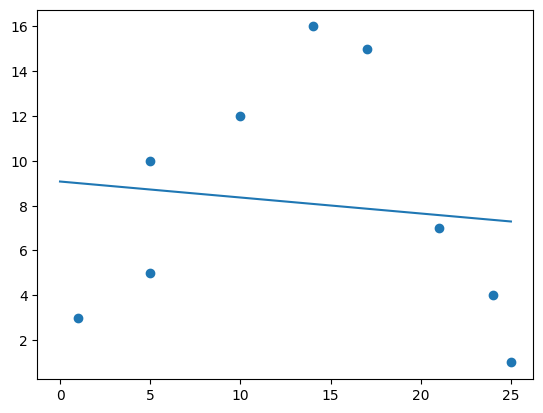

In [9]:
# Step 5: สร้างแบบจำลอง

model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())     # ลองเพิ่ม degree ดูนะครับ: PolynomialFeatures(degree=1), LinearRegression()

model.fit(x[:, np.newaxis], y)                 # np.newaxis จะทำการเปลี่ยนข้อมูลจาก 1 มิติ เป็น 2 มิติ: x[:, np.newaxis], y

xfit = np.linspace(0, 25, 1000) # ข้อมูลสำหร้บการวาดเส้นในแกน x (input)
yfit = model.predict(xfit[:, np.newaxis])         # ข้อมูลสำหรับการวาดเส้นในแกน y (output): xfit[:, np.newaxis]

plt.scatter(x, y)               # แสดงจุดของ x และ y: x, y
plt.plot(xfit, yfit)                  # วาดเส้น: xfit, yfit

In [10]:
# Step 6: ค่า R2 ใช้เพื่อวัดประสิทธิภาพของแบบจำลอง เข้าใกล้ 1 แปลว่า การทำนายจะ Fit กับข้อมูลมาก
r2 = model.score( x[:, np.newaxis], y)          # np.newaxis จะทำการเปลี่ยนข้อมูลจาก 1 มิติ เป็น 2 มิติ: x[:, np.newaxis], y

print(f'coefficient of determination: {r2}')

coefficient of determination: 0.013655755491481791
